In [8]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread(r"C:\Users\kyuha\Desktop\water_coins.jpg")
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

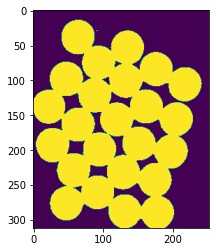

In [21]:
plt.imshow(thresh)

In [22]:
thresh.dtype

dtype('uint8')

In [23]:
np.unique(thresh)

array([  0, 255], dtype=uint8)

In [9]:
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
sure_bg = cv2.dilate(opening,kernel,iterations=3)
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

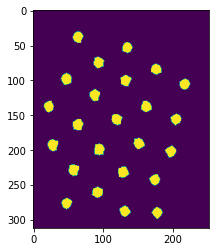

In [10]:
plt.imshow(sure_fg)

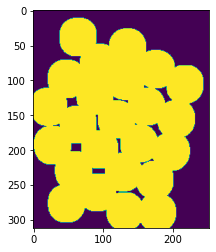

In [11]:
plt.imshow(sure_bg)

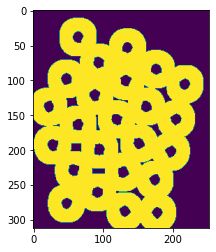

In [12]:
plt.imshow(unknown)

In [13]:
ret, markers = cv2.connectedComponents(sure_fg)
markers = markers+1
markers[unknown==255] = 0

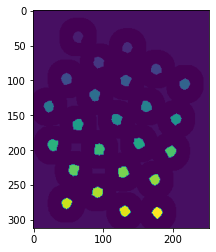

In [14]:
plt.imshow(markers)

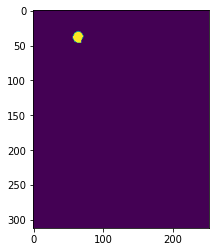

In [19]:
plt.imshow(markers==2)

In [15]:
np.unique(markers)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25], dtype=int32)

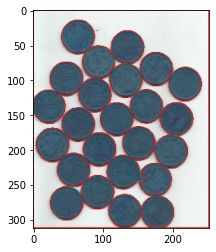

In [5]:
markers2 = cv2.watershed(img,markers)
img[markers2 == -1] = [255,0,0]
plt.imshow(img)